In [423]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import sys

sys.ignore_warnings = True

pd.set_option('display.max_columns', None)

# Cargamos dataset original

In [424]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_2944\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


## Carácteristicas train original

In [425]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
790217,uUGlbI7UikUjKF2SkK0LPw,o_FBN4ht-d_KmekyxDOjHQ,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,0,0,Brionne Bagneris was our tour guide and she wa...,2017-01-22 18:34:18
782676,Ff4oE2uecHL_E7jhtPS99Q,SChXFrsehSsO2O-_l1Cq8w,Xz97EH7xunUoRX0Vp3iKug,4.0,1,0,0,"Good food, Great views. I've been coming here...",2010-11-12 03:48:25
174919,qQGzbRgFcd2Lza97G_t8SA,nRRvAmz3K9jSvenAf_H4wg,we7Eb82sguRbhDlVQHRYXg,5.0,5,1,2,This is going to be a rare short review - but ...,2021-02-24 10:47:06
375069,QJA6GrrT3uPNc1JrUSbByw,Ls6EQzNXOkBwrRT_X9vRqw,LeokvVphuMZn9L0oYYPY1Q,1.0,0,0,0,I deeply discourage going this office. I have ...,2017-11-10 18:20:02
675066,DqQDFaL_0ar4ionbfyOH0Q,cXXrc7PhCkvhwGd59dXPfg,-sSGKR1V1oBm7BJicIXozg,4.0,1,0,0,I've read so many mixed reviews on this place ...,2014-05-26 14:43:38


In [426]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [427]:
train_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

## Carácteristicas test original

In [428]:
test_reviews.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date
62448,Xg50YTmQl-KBN08YocHpjA,apLp4J9NNdDZ4ZdYw5a70A,L9QTAucz_in5f-ufCrvb1Q,0,0,0,"Excellent service, great atmosphere and very c...",2010-04-20 01:42:33
332179,kLsR5gLGdZZQn-UhnSv4hQ,6L9LX7jzmHQoO36rHyYYHQ,LCO6N4WIk4U854AVmHHjrg,0,0,0,"It's a classic bowling alley, but they do a go...",2017-01-02 14:56:23
205813,N3PpvZLd9eZhD-CMe-UP7g,b2c-C3L1sqi56wdp1bUkYQ,Ih6qAkEQRgk6zsaGTz5HUQ,1,0,1,Slow service when there's not that many ppl in...,2017-08-13 04:08:20
84669,dKP0VnV2Mzzw-ew4bDQCZQ,-DTW1LNL-eWCtHqKJhweCA,rKggQN5KT6AtOlmuJ8NAZQ,0,0,0,"So, these guys are new to the hood, and trailb...",2013-12-17 21:57:56
313054,jzDRjRyoY1nU3jCWZ3MPmA,CV4BMLxPSuC5V92JUfQlsw,wueXNaxuNKjr8sq-AyWCog,2,2,1,Limited review: I scouted this place out by pi...,2011-02-24 16:16:03


In [429]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [430]:
test_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date'],
      dtype='object')

# Exploración usuario

In [431]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
642759,t-RSnpL6-qKobcpeLuO3Bw,Robert,2,2019-11-10 01:42:29,0,0,0,NaN,NaN,0,4.50,0,0,0,0,0,0,0,0,0,0,0
233492,NSZJlh68DXiWDvLK0qVSYg,Sarah,31,2011-08-19 01:14:45,12,0,3,NaN,"yfQ-Y8fpw7LEXhlCVS5EFw, fR4HdVk_8EOIl6smrVxvvg...",1,3.68,0,1,0,0,0,0,1,0,0,0,0
577063,ll1Gkl8RqpCbU1cHRj3KaA,Dan,2,2016-02-21 15:42:51,4,0,0,NaN,"xPwI-vIkYKg80qnGOOtPLQ, b_xVLvft4qUYTe9zOpxKxg...",0,1.50,0,0,0,0,0,0,0,0,0,1,0
668107,NYOHdr1eaMuuM9TvmhOdow,Brandon,1,2012-02-09 14:51:09,1,0,0,NaN,"nCfvFQWOUjDZeeC7TLASbA, 6PR8wgoTzLQdgtAsuyBDvQ...",0,5.00,0,0,0,0,0,0,0,0,0,0,0
683884,eZr7AqzCBm-hwrMq0qkEiA,Santiago,7,2019-04-12 23:21:45,1,0,0,NaN,NaN,1,4.78,0,0,0,0,0,0,1,0,0,0,0


In [432]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [433]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [434]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

## Drop columnas

In [435]:
new_usuarios = usuarios.drop(columns=["name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

## Procesamiento `yelping_since`

In [436]:
new_usuarios['yelping_since'] = pd.to_datetime(new_usuarios['yelping_since'])

new_usuarios['antiguedad_anios'] = (pd.to_datetime('today') - new_usuarios['yelping_since']).dt.days / 365.25

new_usuarios['reviews_por_anio'] = new_usuarios['review_count'] / new_usuarios['antiguedad_anios']

new_usuarios = new_usuarios.drop(columns=["yelping_since"])
new_usuarios.sample(5)

,user_id,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,antiguedad_anios,reviews_por_anio
37588,sDPHFDVrjztvMT8iSLaXTg,1,0,0,0,NaN,"nfDFvmTk9DVEweimRcNJVQ, mcJ-ES9fFAtv5BEybq8fmQ...",0,5.00,0,0,0,0,0,0,0,0,0,0,0,11.603012,0.086185
130955,-cazUBGix9wfFYx3p-gqdw,85,95,28,28,NaN,"AHRrG3T1gJpHvtpZ-K0G_g, fcS5-x642TTmgH-NjD904A...",3,3.38,2,0,0,0,0,7,3,1,1,1,1,12.851472,6.614029
600072,rceXf94hGt4jiKBGpe2Ygw,2,0,0,0,NaN,NaN,0,3.00,0,0,0,0,0,0,0,0,0,0,0,9.574264,0.208893
427405,6iOC2BwAEWJ55SE8oDkR3Q,2,0,1,0,NaN,NaN,0,2.00,0,0,0,0,0,0,0,0,0,0,0,12.213552,0.163753
237404,tzbAJgSaqOgMmxnT-YEEeQ,6,3,1,0,NaN,"-1mm80YgKPMrygNaOv3iyw, JYo4bPtou-b_cnLowElS4w...",0,4.50,0,0,0,0,0,0,0,0,0,0,0,13.423682,0.446971


## Procesamiento `friends` and `fans`

In [437]:
new_usuarios['friends'] = new_usuarios['friends'].fillna('')

new_usuarios['num_friends'] = new_usuarios['friends'].apply(lambda x: len(x.split(',')) if x.strip() != '' else 0)

def contar_anios_elite(x):
    if isinstance(x, list):
        return len(x)
    elif isinstance(x, str):
        return len(x.split(',')) if x.strip() != '' else 0
    else:
        return 0

new_usuarios['num_elite_years'] = new_usuarios['elite'].apply(contar_anios_elite)

new_usuarios['influencia_social'] = new_usuarios['num_friends'] + new_usuarios['fans'] + 2 * new_usuarios['num_elite_years']
new_usuarios = new_usuarios.drop(columns=["friends", "elite"])
new_usuarios.sample(5)

,user_id,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,antiguedad_anios,reviews_por_anio,num_friends,num_elite_years,influencia_social
235739,k97c4eriYUeMG_cGw8rYLQ,739,1409,489,682,68,3.97,11,2,1,1,0,25,20,32,32,27,12,9.314168,79.341490,424,7,506
318955,HmNU6_6Uz0It-qrSiEoVkA,32,38,13,2,1,3.41,0,0,0,0,0,0,0,0,0,0,0,16.325804,1.960087,25,0,26
245871,Bu7DgV4_xtgQPKziUGPdTw,267,675,186,198,63,3.32,6,3,1,1,0,16,17,27,27,11,3,13.385352,19.947177,105,6,180
665619,xq2sfuXeP5lUVuBnqFZdNg,6,4,3,2,0,4.33,0,0,0,0,0,0,0,0,0,0,0,11.983573,0.500685,182,0,182
672692,RY09O7LqUeoW3KF4wxS22g,57,52,9,11,0,3.50,0,0,0,0,0,2,1,0,0,1,0,12.161533,4.686909,69,0,69


## Procesamiento `compliment_`

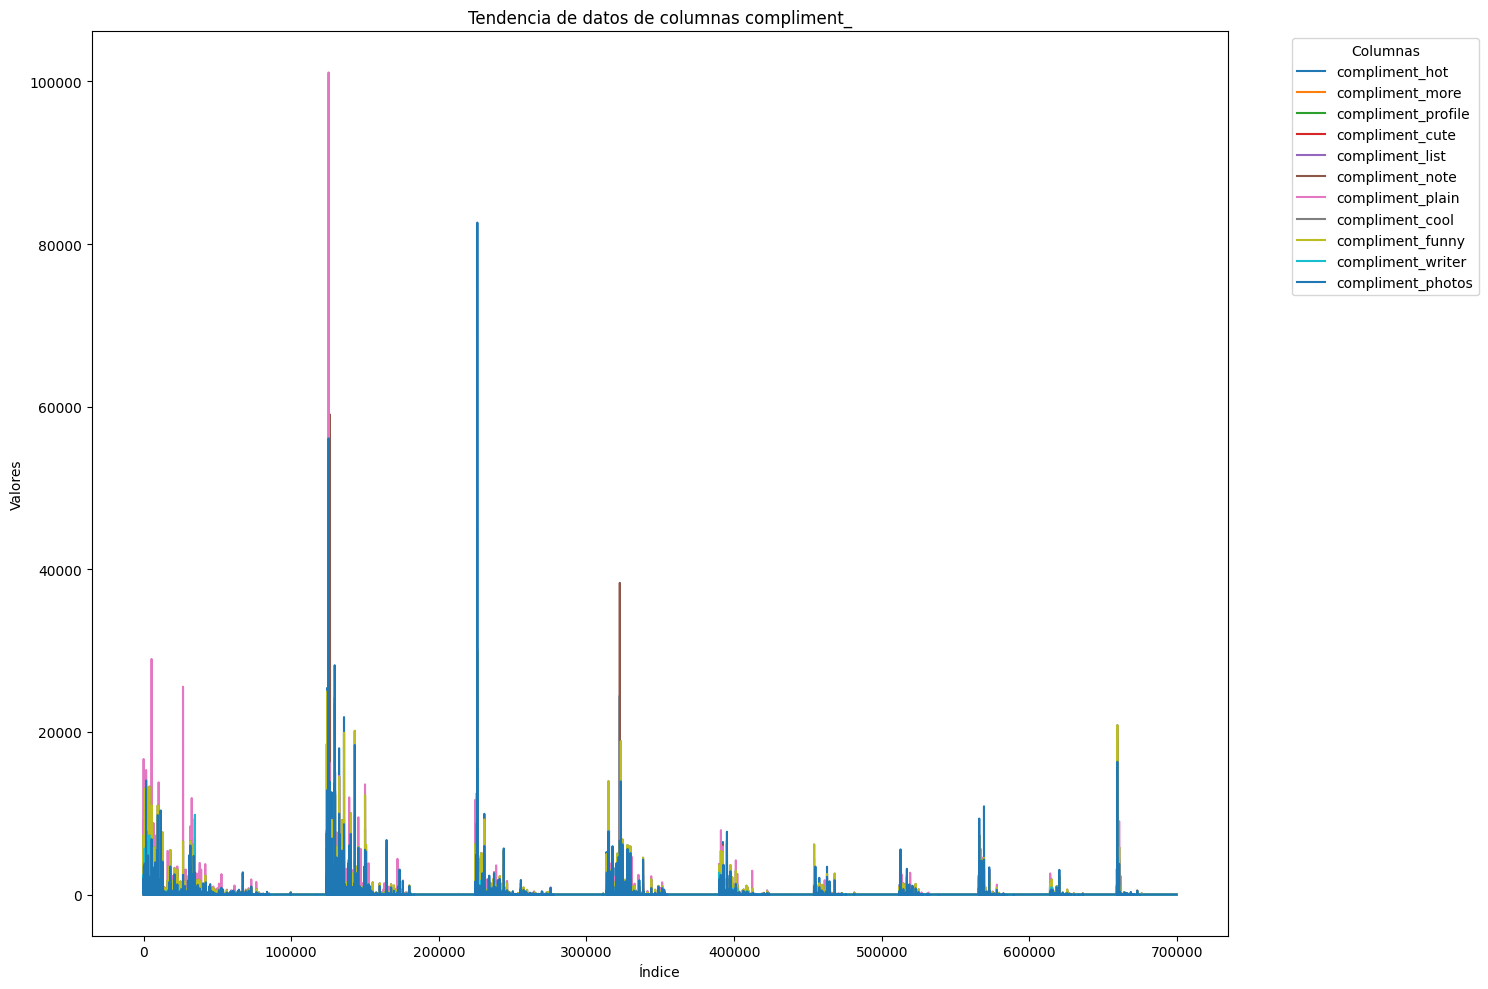

In [438]:
# Filtrar las columnas que comienzan con 'compliment_'
compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

# Crear un DataFrame con solo esas columnas
compliment_data = new_usuarios[compliment_cols]

# Crear un gráfico de distribución para cada columna
compliment_data.plot(kind='line', figsize=(15, 10), title='Tendencia de datos de columnas compliment_')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [439]:
new_usuarios['compliment'] = new_usuarios[compliment_cols].sum(axis=1)

new_usuarios = new_usuarios.drop(columns=compliment_cols)

new_usuarios.sample(5)

,user_id,review_count,useful,funny,cool,fans,average_stars,antiguedad_anios,reviews_por_anio,num_friends,num_elite_years,influencia_social,compliment
667567,18nKuyfOGnPA2nznes1Opg,12,13,0,5,0,3.93,13.538672,0.886350,125,0,125,2
302542,40rsrpmnSycllHj-fn5m6A,6,4,0,2,0,4.43,9.338809,0.642480,0,0,0,0
662338,Vhfq6EW4cTvsvJ_uFk61OQ,182,518,129,214,29,3.72,11.622177,15.659717,598,3,633,220
638189,l6EpXbPVzNPJUHpVCfMqeA,109,91,31,15,2,2.71,13.648186,7.986409,2,0,4,1
49811,w1i55QG6mjAJ67PQ5oxlVg,8,29,4,18,0,3.80,8.648871,0.924976,62,0,62,1


In [440]:
new_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            699619 non-null  object 
 1   review_count       699619 non-null  int64  
 2   useful             699619 non-null  int64  
 3   funny              699619 non-null  int64  
 4   cool               699619 non-null  int64  
 5   fans               699619 non-null  int64  
 6   average_stars      699619 non-null  float64
 7   antiguedad_anios   699619 non-null  float64
 8   reviews_por_anio   699619 non-null  float64
 9   num_friends        699619 non-null  int64  
 10  num_elite_years    699619 non-null  int64  
 11  influencia_social  699619 non-null  int64  
 12  compliment         699619 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 69.4+ MB


## Procesamiento columnas de enteros

In [441]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
    'antiguedad_anios', 'reviews_por_anio', 'num_friends',
    'influencia_social', 'num_elite_years', 'compliment'
]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(new_usuarios[cols_to_scale])

df_scaled = pd.DataFrame(scaled_values, columns=cols_to_scale, index=new_usuarios.index)

new_usuarios = pd.concat([new_usuarios[['user_id']], df_scaled], axis=1)
new_usuarios.sample(5)

,user_id,review_count,useful,funny,cool,fans,average_stars,antiguedad_anios,reviews_por_anio,num_friends,influencia_social,num_elite_years,compliment
129990,8xTfXzXoSNCq1QdTphStvg,-0.107919,-0.043693,-0.008495,-0.040806,-0.022051,0.485401,1.312299,-0.160989,-0.265133,-0.246860,-0.241889,-0.022980
335946,wKrOXkZP4N_1oRayPRlR8w,-0.148926,-0.072626,-0.049962,-0.053261,-0.092248,0.265404,0.563620,-0.172906,-0.309201,-0.296775,-0.241889,-0.032664
292816,eDm5wqEyO6lA8NQcI1KHog,-0.255546,-0.076617,-0.051557,-0.053261,-0.092248,-1.064146,-0.445663,-0.273999,-0.342251,-0.326723,-0.241889,-0.033875
169428,gfTTcB7BMRmQHFRbB_lM0A,-0.255546,-0.076617,-0.051557,-0.053261,-0.057150,-0.480674,-0.461783,-0.273619,-0.077848,-0.082142,-0.241889,-0.033875
8502,cQU8IWVEJYcklBJbW9CzdQ,2.180296,0.666669,0.463597,0.403043,0.855418,-0.069375,1.671414,1.837339,2.175091,2.119089,1.843988,0.088386


In [442]:
new_usuarios.shape

(699619, 13)

In [443]:
new_usuarios.isnull().sum()

user_id              0
review_count         0
useful               0
funny                0
cool                 0
fans                 0
average_stars        0
antiguedad_anios     0
reviews_por_anio     0
num_friends          0
influencia_social    0
num_elite_years      0
compliment           0
dtype: int64

# Exploración negocio

In [444]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8945,3u1cP7H4g325tkhNE4ncbA,IHOP,520 Pleasant Grove Rd,Mount Juliet,TN,37122,36.177858,-86.517012,3.0,25,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","American (Traditional), Restaurants, Burgers, ...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
22523,aslnykn8l-TM3GjWlKR2iQ,FishHawk Barber Shop,13456 Boyette Rd,Riverview,FL,33569,27.851281,-82.267910,4.0,9,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Beauty & Spas, Barbers","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
13311,cbAolLuAoWG9r7HSup27Rw,Ross Dress for Less,2863 Northtowne Ln,Reno,NV,89512,39.553702,-119.785849,1.5,8,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Discount Store, Home Decor, Home & Garden, Fas...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
9989,iLgoPRWEJRr1NMUxzBieug,Hacienda Motel,3643 State St,Santa Barbara,CA,93190,34.440049,-119.741948,2.0,23,1,"{'RestaurantsPriceRange2': '1', 'WiFi': ""u'fre...","Event Planning & Services, Hotels & Travel, Ho...",NaN
22728,e22aZjTlnDwyHd3xJ5xsbg,Four Brothers Tree,NaN,Bensalem,PA,19020,40.099443,-74.932568,4.5,7,1,"{'BusinessAcceptsCreditCards': 'False', 'Busin...","Home Services, Tree Services","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [445]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [446]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [447]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

## Drop columnas

In [448]:
new_negocios = negocios.drop(columns=["name"]) # ?
new_negocios.columns

Index(['business_id', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'attributes',
       'categories', 'hours'],
      dtype='object')

## Procesamiento `latitude` and `longitud`

In [449]:
ref_lat = new_negocios['latitude'].mean()
ref_lon = new_negocios['longitude'].mean()

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calcular la distancia de cada negocio al punto de referencia
new_negocios['distancia_ref'] = new_negocios.apply(
    lambda row: haversine_distance(row['latitude'], row['longitude'], ref_lat, ref_lon),
    axis=1
)

new_negocios = new_negocios.drop(columns=["latitude", "longitude"])
new_negocios.sample(5)

,business_id,address,city,state,postal_code,stars,review_count,is_open,attributes,categories,hours,distancia_ref
10092,pzYjWGtDZtzNiU7-Kwoebw,1630 Kings Hwy,Cherry Hill,NJ,08002,3.5,62,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mexican, Fast Food, Event Planning & Services,...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...",1299.481607
26906,iDYrFicxiU97EBgulvQZBw,586 Rte 38 E,Maple Shade,NJ,08052,3.0,91,1,{'BusinessAcceptsCreditCards': 'True'},"Gas Stations, Oil Change Stations, Car Wash, A...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1303.298584
26103,KSz4iaxIkC0uiLZJjM7AAg,14914 N Florida Ave,Tampa,FL,33613,3.5,22,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Beauty & Spas, Nail Salons","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1154.901319
24728,v6-cuf0GWBHA6ryma3jhOA,219 N Center St,Reno,NV,89501,3.0,8,0,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...","Nightlife, Dance Clubs, Bars, Lounges","{'Friday': '18:0-2:0', 'Saturday': '18:0-2:0'}",2670.929788
8435,3WC9HidyqFisiDxP1dcFCA,2702 W Kennedy Blvd,Tampa,FL,33609,4.0,418,1,"{'BikeParking': 'False', 'OutdoorSeating': 'Tr...","Tex-Mex, Seafood, Mexican, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-23:0'...",1166.707186


## Procesamiento `state`

In [450]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

In [451]:
new_negocios.shape

(30069, 12)

In [452]:
state_threshold = state_counts.mean()

new_negocios['state_reduced'] = new_negocios['state'].apply(
    lambda x: x if state_counts[x] > state_threshold else 'Other'
)

new_negocios = pd.get_dummies(new_negocios, columns=['state_reduced'], prefix='state')

state_columns = [col for col in new_negocios.columns if col.startswith('state_')]
new_negocios[state_columns] = new_negocios[state_columns].astype(int)
new_negocios.sample(5)

,business_id,address,city,state,postal_code,stars,review_count,is_open,attributes,categories,hours,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN
6883,jlOnEtARzrVDGGhXZ36T8g,"1629 Westbank Expy, Ste E",Harvey,LA,70058,2.5,10,1,"{'WiFi': ""u'no'"", 'HappyHour': 'False', 'DogsA...","Pet Groomers, Pet Services, Pet Stores, Pet Tr...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",758.543519,0,0,0,1,0,0,0,0,0
20591,4VaEkCFqCsk656jQxPpUpw,406 Germantown Pk,Lafayette Hill,PA,19444,3.0,19,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Delis, Coffee & Tea, Sandwi...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1282.609447,0,0,0,0,0,0,0,1,0
2306,IJjBbfsG4Frje0v8_jQ4vg,"1500 Walnut St, Ste 600",Philadelphia,PA,19102,3.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Health & Medical, Endodontists, Dentists","{'Monday': '8:0-19:0', 'Tuesday': '8:0-17:0', ...",1287.170495,0,0,0,0,0,0,0,1,0
23558,xyRqTr-TpKmqAP7SgwB1Og,1875 West Mcewen Dr,Franklin,TN,37067,2.5,10,1,NaN,"Automotive, Body Shops","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...",241.826009,0,0,0,0,0,0,0,0,1
21814,Fnj1vtOUEW6Dx8KndYWuvQ,169 S Delsea Dr,Glassboro,NJ,08028,3.5,28,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Thrift Stores, Discount Store, Used, Vintage &...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1287.053826,0,0,0,0,0,1,0,0,0


In [453]:
new_negocios = new_negocios.drop(columns=["state"])
new_negocios.sample(5)

,business_id,address,city,postal_code,stars,review_count,is_open,attributes,categories,hours,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN
8441,Op81Y69I61Qpv7JnCojoMA,2312 Centerline Industrial Dr,St. Louis,63146,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Tiling, Carpet Installation, Fl...","{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ...",242.506388,0,0,0,0,1,0,0,0,0
29901,_-OS3-VMVJKbFeO-sCLoNQ,"1814 Gallatin Pike N, ACROSS FROM RIVERGATE MALL",Madison,37115,3.0,44,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Seafood, American (Traditional), Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ...",240.980939,0,0,0,0,0,0,0,0,1
23361,f5kgRwWzLWBNofhiLKo8ng,4340 West Ina Rd,Tucson,85741,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Optometrists, Eyewear & Opticians, Shopping, H...","{'Monday': '10:0-14:0', 'Tuesday': '9:0-17:0',...",2042.512332,1,0,0,0,0,0,0,0,0
5332,h8lv8jJPvX6pRx0PogqG3Q,NaN,North Wales,19454,5.0,13,0,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Beauty & Spas, Shopping, Eyelash Service, Pers...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",1284.175370,0,0,0,0,0,0,0,1,0
3283,oWlsswiJQ85a6-fcuGFIhQ,"140 S Camino Seco, Ste 425",Tucson,85710,4.5,12,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Rugs, Shopping, Carpet Cleaning...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",2024.925585,1,0,0,0,0,0,0,0,0


## Procesamiento `hours`

In [454]:
def parse_hours(hours_val):
    """
    Esta función procesa la columna 'hours' y extrae:
    - open_weekends: 1 si el negocio abre en sábado o domingo.
    - open_late: 1 si cierra a las 22:00 o más tarde.
    Además, se puede extender para extraer otras características de los horarios.
    """
    # Si no hay información, devolvemos 0 para ambos indicadores.
    if pd.isna(hours_val):
        return pd.Series({'open_weekends': 0, 'open_late': 0})
    
    # Si viene como cadena, intentamos evaluarla a un diccionario.
    if isinstance(hours_val, str):
        try:
            hours_val = eval(hours_val)
        except:
            return pd.Series({'open_weekends': 0, 'open_late': 0})
    
    open_weekends = 0
    open_late = 0
    
    # Iteramos sobre cada día en el diccionario.
    # Se asume que el formato es "HH:MM-HH:MM" en reloj de 24 horas.
    for day, time_range in hours_val.items():
        try:
            open_time, close_time = time_range.split('-')
            open_hour = int(open_time.split(':')[0])
            close_hour = int(close_time.split(':')[0])
            
            # Si el día es sábado o domingo, marcamos que está abierto en fines de semana.
            if day.lower() in ['saturday', 'sunday']:
                open_weekends = 1
            # Si cierra a las 22:00 o más tarde, marcamos que tiene horario extendido.
            if close_hour >= 22:
                open_late = 1
        except Exception as e:
            # En caso de error en el parseo, continuamos con el siguiente día.
            continue
    
    return pd.Series({'open_weekends': open_weekends, 'open_late': open_late})

# Aplicar la función a la columna 'hours' del DataFrame new_negocios
new_negocios[['open_weekends', 'open_late']] = new_negocios['hours'].apply(parse_hours)
new_negocios = new_negocios.drop(columns=["hours"])
new_negocios.sample(5)

,business_id,address,city,postal_code,stars,review_count,is_open,attributes,categories,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN,open_weekends,open_late
13721,cCwGNGOCvhigKOLSFUaVDg,3901 3rd St N,Saint Petersburg,33703,4.0,60,0,"{'Caters': 'False', 'WiFi': ""u'free'"", 'Restau...","Coffee & Tea, Food",1172.113107,0,1,0,0,0,0,0,0,0,1,0
1411,ullxU7bGOcstxGBUU9Q30A,"Ameristar Casino Resort Spa St Charles, One Am...",St. Charles,63301,4.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Nail Salons, Day Spas, Massage, Hair Salons, B...",250.760357,0,0,0,0,1,0,0,0,0,1,0
9363,dmdFCnYx5OKkit71uBgUSA,5725 W Ina Rd,Tucson,85743,3.5,5,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Car Wash, Gas Stations, Automotive, Convenienc...",2045.067872,1,0,0,0,0,0,0,0,0,0,0
6149,An6U6B1mmU2yMG3YREj2UA,3979 Beacon Ave,Pennsauken Township,08110,3.5,10,1,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","Auto Glass Services, Automotive, Car Window Ti...",1294.509666,0,0,0,0,0,1,0,0,0,1,0
19913,rjco-iKnpK8icKt0SGzFAg,NaN,Tucson,85641,1.0,9,0,NaN,"Food Trucks, Desserts, Food",2020.157342,1,0,0,0,0,0,0,0,0,0,0


## Procesamiento `categories`

In [455]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

Voy a dejarlo igual y hago encoder luego

In [456]:
def process_categories(categories):
    if pd.isna(categories):
        return []
    if isinstance(categories, str):
        return [cat.strip() for cat in categories.split(',')]
    if isinstance(categories, list):
        return categories
    return []

# Definir los grupos y sus palabras clave
group_keywords = {
    "restaurant": ["restaurant", "pizza", "mexican", "chinese", "italian", "burger", "fast food", "sandwich", "barbeque", "diner", "thai", "vietnamese", "sushi"],
    "beauty": ["beauty & spas", "nail salon", "hair salon", "barber", "massage", "tattoo"],
    "automotive": ["automotive", "auto repair", "car wash", "car rental", "car dealer", "auto parts"],
    "food": ["food", "coffee & tea", "ice cream", "frozen yogurt", "donut", "bakeries", "breweries"],
    "hotels_travel": ["hotel", "travel", "event planning"],
    "local_services": ["home services", "real estate", "apartments", "local services", "plumbing", "electrical"],
    "shopping": ["shopping", "jewelry", "discount store", "department store", "thrift"],
    "health": ["health & medical", "chiropractor", "hospital", "urgent care", "dentist", "medical center"],
    "entertainment": ["nightlife", "bar", "cinema", "arts & entertainment", "festival", "museum"],
    "pet": ["pet", "veterinarian", "pet groomer", "pet store"]
}

for group, keywords in group_keywords.items():
    def check_group(categories):
        cats = process_categories(categories)
        cats_lower = [c.lower() for c in cats]
        return int(any(any(keyword in cat for keyword in keywords) for cat in cats_lower))
    
    new_negocios[f'group_{group}'] = new_negocios['categories'].apply(check_group)

new_negocios = new_negocios.drop(columns=["categories"])
print(new_negocios[[f'group_{g}' for g in group_keywords]].sum())
print(new_negocios.shape)
new_negocios.sample(5)

group_restaurant        10495
group_beauty             2998
group_automotive         2244
group_food               7217
group_hotels_travel      2519
group_local_services     4400
group_shopping           4872
group_health             2372
group_entertainment      4474
group_pet                 916
dtype: int64
(30069, 30)


,business_id,address,city,postal_code,stars,review_count,is_open,attributes,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN,open_weekends,open_late,group_restaurant,group_beauty,group_automotive,group_food,group_hotels_travel,group_local_services,group_shopping,group_health,group_entertainment,group_pet
19422,zVagjsscMqU6ztrFvv6hOg,NaN,Newark,19702,3.5,7,1,"{'Ambience': ""{'touristy': False, 'hipster': F...",1240.439117,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
21934,TNLyWr5_vgg1qjb5BvQMGQ,10937 120 Street,Edmonton,T5R 3H3,3.5,7,1,"{'GoodForKids': 'True', 'BikeParking': 'True',...",2641.890801,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
12837,yS0TsUzKBQlHQCZZeBrxww,3818 N Highschool Rd,Indianapolis,46254,4.5,176,1,"{'BusinessParking': ""{'garage': False, 'street...",439.173385,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
1357,qIn57tACk3lBmTNOpZoT8w,1640 W Brandon Blvd,Brandon,33511,4.5,7,1,"{'BusinessParking': ""{'garage': False, 'street...",1176.570993,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
29302,hbv4cIM4kx5tkJan4XKaiQ,73 Queen Lily Rd,Levittown,19057,5.0,6,1,{'BusinessAcceptsCreditCards': 'True'},1316.996396,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0


## Procesamiento `attributes`

In [457]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

In [458]:
import pandas as pd
import ast

def parse_attributes_value(attr):
    """
    Convierte el contenido de la columna 'attributes' en un diccionario.
    Si es nulo o falla la conversión, devuelve un diccionario vacío.
    """
    if pd.isna(attr):
        return {}
    if isinstance(attr, dict):
        return attr
    if isinstance(attr, str):
        try:
            # Usamos ast.literal_eval para evaluar de forma segura la cadena
            parsed = ast.literal_eval(attr)
            return parsed if isinstance(parsed, dict) else {}
        except Exception as e:
            return {}
    return {}

def check_attribute_group(attr, keywords):
    """
    Devuelve 1 si alguna de las claves en 'keywords' aparece en el diccionario 'attr'
    y cumple la condición definida para cada grupo, considerando casos especiales para WiFi y BusinessParking.
    """
    for key in keywords:
        if key in attr:
            val = attr[key]
            # Caso especial para WiFi:
            if key == "WiFi":
                if isinstance(val, str):
                    # Convertir a minúsculas y buscar "free"
                    val_str = val.lower()
                    if "free" in val_str:
                        return 1
                    else:
                        continue
                elif isinstance(val, bool) and val:
                    return 1
            # Caso especial para BusinessParking:
            elif key == "BusinessParking":
                parking_dict = {}
                if isinstance(val, str):
                    try:
                        parking_dict = ast.literal_eval(val)
                    except:
                        parking_dict = {}
                elif isinstance(val, dict):
                    parking_dict = val
                # Se marca 1 si al menos un subatributo es True
                if isinstance(parking_dict, dict) and any(parking_dict.values()):
                    return 1
            else:
                # Para los demás atributos, asumimos que un valor "True" (o equivalente) es suficiente.
                if isinstance(val, str):
                    if val.lower() == "true":
                        return 1
                    else:
                        # Si se trata de un número en forma de cadena, intentamos convertirlo
                        try:
                            float(val)
                            return 1
                        except:
                            continue
                elif isinstance(val, bool) and val:
                    return 1
                else:
                    # Si existe el valor, lo consideramos presente.
                    return 1
    return 0

# Definir grupos y claves asociados para los atributos
group_keywords_attributes = {
    "payment": ["BusinessAcceptsCreditCards"],
    "appointment": ["ByAppointmentOnly"],
    "takeout_delivery": ["RestaurantsTakeOut", "RestaurantsDelivery"],
    "parking": ["BusinessParking"],   # Caso especial
    "wifi": ["WiFi"],                 # Caso especial
    "bitcoin": ["BusinessAcceptsBitcoin"],
    "insurance": ["AcceptsInsurance"],
    "price_range": ["RestaurantsPriceRange2"],
    "kids": ["GoodForKids"]
}

# Crear nuevas columnas para cada grupo en new_negocios
for group, keys in group_keywords_attributes.items():
    new_negocios[f'attr_{group}'] = new_negocios['attributes'].apply(
        lambda x: check_attribute_group(parse_attributes_value(x), keys)
    )

new_negocios = new_negocios.drop(columns=["attributes"])
print(new_negocios[[f'attr_{g}' for g in group_keywords_attributes]].sum())
print(new_negocios.shape)
new_negocios.sample(5)

attr_payment             22643
attr_appointment          3093
attr_takeout_delivery    11065
attr_parking             12484
attr_wifi                 6811
attr_bitcoin                91
attr_insurance             800
attr_price_range         17030
attr_kids                 8869
dtype: int64
(30069, 38)


,business_id,address,city,postal_code,stars,review_count,is_open,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN,open_weekends,open_late,group_restaurant,group_beauty,group_automotive,group_food,group_hotels_travel,group_local_services,group_shopping,group_health,group_entertainment,group_pet,attr_payment,attr_appointment,attr_takeout_delivery,attr_parking,attr_wifi,attr_bitcoin,attr_insurance,attr_price_range,attr_kids
26366,aegucLbgtvBtwJLsmr0QVQ,"4117 W Henderson Blvd, Ste 100",Tampa,33629,3.5,5,1,1166.994279,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
20580,EERwPZdemE21aIwYsadjTg,2264 Lebanon Rd,Nashville,37214,4.0,306,1,245.370979,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1
25168,FrCrCAYKtczmCZBaOGvbDQ,5858 Hampton Ave,Saint Louis,63109,2.5,14,0,224.929706,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
19593,GduRGjJmz2syYgaL83RInw,4631 N Oracle Rd,Tucson,85705,3.5,14,1,2037.215845,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0
17886,B8wBwuAHxYhdB2v7BsEPvw,2603 W Kennedy Blvd,Tampa,33609,4.0,21,1,1166.713677,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0


## Procesamiento `city`

In [459]:
new_negocios['city'].value_counts()

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Teniendo `state` omitimos city, postal_code y address (de moemnto al menos)

In [460]:
new_negocios = new_negocios.drop(columns=["city", "postal_code", "address"])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN,open_weekends,open_late,group_restaurant,group_beauty,group_automotive,group_food,group_hotels_travel,group_local_services,group_shopping,group_health,group_entertainment,group_pet,attr_payment,attr_appointment,attr_takeout_delivery,attr_parking,attr_wifi,attr_bitcoin,attr_insurance,attr_price_range,attr_kids
17293,SJp0woUvaTRuExUncQ-EiQ,4.5,12,1,1162.453027,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0
3047,FLSVxSLNM6H4elwnSDaGOw,3.0,10,1,223.291219,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
26691,PwbaCaNFxHwiB2Q9Nwo90w,3.5,17,0,233.424781,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1221,aI2w94F3TvIuPTcflKVCJQ,3.5,88,0,755.571278,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1
20856,tZOibT5Tfzfd6kkCNFJGGA,4.0,5,1,2039.715681,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Últimos pasos

In [461]:
new_negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            30069 non-null  object 
 1   stars                  30069 non-null  float64
 2   review_count           30069 non-null  int64  
 3   is_open                30069 non-null  int64  
 4   distancia_ref          30069 non-null  float64
 5   state_AZ               30069 non-null  int32  
 6   state_FL               30069 non-null  int32  
 7   state_IN               30069 non-null  int32  
 8   state_LA               30069 non-null  int32  
 9   state_MO               30069 non-null  int32  
 10  state_NJ               30069 non-null  int32  
 11  state_Other            30069 non-null  int32  
 12  state_PA               30069 non-null  int32  
 13  state_TN               30069 non-null  int32  
 14  open_weekends          30069 non-null  int64  
 15  op

In [462]:
cols_continuas = ['stars', 'review_count', 'distancia_ref']

new_negocios[cols_continuas] = scaler.fit_transform(new_negocios[cols_continuas])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,distancia_ref,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Other,state_PA,state_TN,open_weekends,open_late,group_restaurant,group_beauty,group_automotive,group_food,group_hotels_travel,group_local_services,group_shopping,group_health,group_entertainment,group_pet,attr_payment,attr_appointment,attr_takeout_delivery,attr_parking,attr_wifi,attr_bitcoin,attr_insurance,attr_price_range,attr_kids
1475,hqGYH5oZirUFeM3uzL4VuQ,0.930844,-0.002951,1,0.046740,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19244,BmPXV3ZJO5_9Cn0L7uBkSw,0.930844,-0.296027,1,1.841952,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22568,m0NNIAY_op4dHhnspAXu2Q,0.419666,-0.129687,1,1.870994,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
13843,xlOOQd95RsVMQ2isN_OK_Q,0.930844,-0.264343,1,1.984310,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
10233,_ihHbuK9r3PLwMUhURKPYg,1.442022,-0.288106,1,0.044484,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [463]:
new_negocios.isnull().sum()

business_id              0
stars                    0
review_count             0
is_open                  0
distancia_ref            0
state_AZ                 0
state_FL                 0
state_IN                 0
state_LA                 0
state_MO                 0
state_NJ                 0
state_Other              0
state_PA                 0
state_TN                 0
open_weekends            0
open_late                0
group_restaurant         0
group_beauty             0
group_automotive         0
group_food               0
group_hotels_travel      0
group_local_services     0
group_shopping           0
group_health             0
group_entertainment      0
group_pet                0
attr_payment             0
attr_appointment         0
attr_takeout_delivery    0
attr_parking             0
attr_wifi                0
attr_bitcoin             0
attr_insurance           0
attr_price_range         0
attr_kids                0
dtype: int64

In [464]:
usuarios.shape, new_usuarios.shape, negocios.shape, new_negocios.shape

((699619, 22), (699619, 13), (30069, 14), (30069, 35))

# Mergear datos

## Train

In [465]:
# Renombrar columnas de new_negocios, excepto 'business_id'
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)

# # Renombrar columnas de new_usuarios, excepto 'user_id'
new_usuarios_renamed = new_usuarios.rename(
    columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
)

# Unir las reseñas con la información de negocios
df_merged = train_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_merged = df_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_merged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,0.930844,0.773303,1,-0.136606,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.230941,-0.070630,-0.046773,-0.053261,-0.092248,0.380185,-0.345362,-0.241032,-0.331234,-0.316740,-0.241889,-0.033875
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,-1.113868,-0.177212,1,-0.128492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,-0.050509,-0.040699,-0.049962,-0.050997,-0.092248,-0.758062,-0.889855,0.092082,-0.342251,-0.326723,-0.241889,-0.035085
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,-1.113868,-0.296027,1,-1.351801,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,-0.271949,-0.046686,-0.041988,-0.050997,-0.092248,0.064537,0.251074,-0.307157,-0.281659,-0.271817,-0.241889,-0.033875
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,0.930844,0.226757,0,-0.138512,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0.146327,-0.041697,-0.037203,-0.043071,-0.057150,0.102797,-0.189536,0.269431,-0.331234,-0.311749,-0.241889,-0.032664
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,0.419666,-0.105924,1,-0.116508,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.138707,0.110951,-0.006900,0.097330,0.118344,0.494966,-1.162998,2.430266,-0.199033,-0.127065,2.539280,0.004861


In [466]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   review_id                  967784 non-null  object 
 1   user_id                    967784 non-null  object 
 2   business_id                967784 non-null  object 
 3   stars                      967784 non-null  float64
 4   useful                     967784 non-null  int64  
 5   funny                      967784 non-null  int64  
 6   cool                       967784 non-null  int64  
 7   text                       967784 non-null  object 
 8   date                       967784 non-null  object 
 9   stars_neg                  967784 non-null  float64
 10  review_count_neg           967784 non-null  float64
 11  is_open_neg                967784 non-null  int64  
 12  distancia_ref_neg          967784 non-null  float64
 13  state_AZ_neg               96

review_id                    0
user_id                      0
business_id                  0
stars                        0
useful                       0
funny                        0
cool                         0
text                         0
date                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_en

In [467]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'stars_neg', 'review_count_neg', 'is_open_neg',
       'distancia_ref_neg', 'state_AZ_neg', 'state_FL_neg', 'state_IN_neg',
       'state_LA_neg', 'state_MO_neg', 'state_NJ_neg', 'state_Other_neg',
       'state_PA_neg', 'state_TN_neg', 'open_weekends_neg', 'open_late_neg',
       'group_restaurant_neg', 'group_beauty_neg', 'group_automotive_neg',
       'group_food_neg', 'group_hotels_travel_neg', 'group_local_services_neg',
       'group_shopping_neg', 'group_health_neg', 'group_entertainment_neg',
       'group_pet_neg', 'attr_payment_neg', 'attr_appointment_neg',
       'attr_takeout_delivery_neg', 'attr_parking_neg', 'attr_wifi_neg',
       'attr_bitcoin_neg', 'attr_insurance_neg', 'attr_price_range_neg',
       'attr_kids_neg', 'review_count_user', 'useful_user', 'funny_user',
       'cool_user', 'fans_user', 'average_stars_user', 'antiguedad_anios_user',
       'reviews_por_a

In [468]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.year
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
363864,4OdqpVLiW6blVg18v-ilZQ,0DTU4p5XHRrsHnHmAsqwnQ,ubNXgh90PKODEWzVnXrFyA,4.0,0,0,0,I dropped by here on a Monday afternoon during...,2021,0.930844,0.860433,1,-1.356433,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1.212520,0.160836,0.060086,0.062230,0.399134,0.485401,0.723028,1.282946,0.539094,0.571738,1.843988,0.067808
584588,WgypS-iazn-_y0aKtDaZtw,_BcWyKQL16ndpBdggh2kNA,n5Fdf9RzooS7obq0NecOWw,5.0,3,2,2,Thank god they are here! Philadelphia is a ho...,2008,0.930844,0.559437,1,0.049477,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,34.748404,16.833371,8.246729,10.996543,19.492856,0.007146,1.974109,28.772386,20.082921,21.116560,10.187494,2.728496
431848,3r7qHebrLXx9SBMqNFDGPA,mzidCZ3s67pk7se9nZXh5g,rsMbMeW7IbXxPFh4WwbddQ,4.0,0,0,0,So glad I took the Cure bartender up on his su...,2012,0.930844,4.218920,1,-0.657711,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,-0.181732,-0.067637,-0.049962,-0.048732,-0.057150,0.839310,0.824225,-0.217693,-0.055814,-0.062176,-0.241889,-0.030243
710708,TD57GB0tVbYsGKeFL5_TsA,UD3sm9HQdFAwZaYlL8Xxxw,A3Qt87F7ZaAwCW4CyyB1Fw,5.0,0,0,0,I've been planning on visiting since I found o...,2016,0.930844,1.280244,1,0.043334,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.198135,-0.062649,-0.049962,-0.053261,-0.092248,0.007146,-0.334615,-0.194547,0.362825,0.312183,-0.241889,-0.033875
667622,g1aCXoo63Wunx9HPeG0khQ,EP8o8JnQSI0WEkeodwA8lA,nLxzI1lBOFNTKEnoip66wA,5.0,3,1,4,I am only rating their table at Love in the Ga...,2011,-0.091512,1.208956,0,-0.665908,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,4.722757,3.744568,3.997904,1.894240,2.259368,-0.872844,1.364241,4.348279,0.875107,1.180696,4.625157,2.069982


### Estandarización

In [469]:
cols = ['useful', 'funny', 'cool']

df_merged[cols] = scaler.fit_transform(df_merged[cols])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
656741,3SsnjEGJd3UTp_RbAceYAw,XM1aYb1zVH59S4FqZH6YWw,pym7c6ZFEtmoH16xN2ApBg,5.0,-0.391093,-0.150312,-0.251644,Had dinner here at the bar as a walk-in on a w...,2017,0.930844,9.858643,1,-0.661493,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,-0.222740,-0.075619,-0.051557,-0.053261,-0.092248,0.781920,1.066023,-0.265230,0.092913,0.067601,-0.241889,-0.035085
711882,gJsf66NkIcaELkLH7JtzwQ,EFHtUpOjSQoLRRLfwwm5oA,kkcQYuF3w5iHnHMf0EnRhQ,5.0,-0.391093,-0.150312,-0.251644,Awesome cheesesteaks and milkshakes. Great pla...,2019,0.930844,2.658491,1,0.062641,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.222740,-0.075619,-0.051557,-0.053261,-0.092248,0.944526,0.127488,-0.244402,-0.342251,-0.326723,-0.241889,-0.035085
553424,USAxiAFFohvNfZz88COHAA,IUZRIkWPjCgQmyPHkBlAMQ,LwX2vbzttWYAdoBoVtfvRg,2.0,-0.062341,-0.150312,-0.251644,Service was very good. Dirty fork replaced qui...,2017,-0.091512,5.525878,0,0.044874,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,-0.017703,-0.068635,-0.048367,-0.052129,-0.092248,-0.385023,1.005126,-0.057555,-0.342251,-0.326723,-0.241889,-0.033875
546626,HTys1O-7aDHNjiPN39LzjA,bYcHF1ymL9iEZ8aG9C1oLA,nX-AW2Y9VtJBpq304lNDNg,3.0,-0.062341,-0.150312,-0.251644,I came here for the nachos (my fav food) but s...,2017,-0.091512,0.092100,0,-1.354972,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0.252946,-0.013762,-0.038798,-0.022690,-0.022051,-0.002419,0.069277,0.360553,-0.072339,-0.062176,0.453403,-0.026612
396248,YcJXNidbkZnmxCJethj7pw,IkaSXz4smmA__tayaIzzvA,ycbmvmBYk4w_ZmdrPL0tBQ,5.0,-0.391093,-0.150312,0.255613,I've had one of the best burgers in my life at...,2021,0.419666,2.515914,1,1.980415,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,-0.271949,-0.077614,-0.051557,-0.052129,-0.092248,1.260175,-2.135563,-0.240167,-0.342251,-0.326723,-0.241889,-0.035085


In [470]:
df_merged.isnull().sum()

review_id                    0
user_id                      0
business_id                  0
stars                        0
useful                       0
funny                        0
cool                         0
text                         0
date                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_en

### Procesamos date

In [471]:
df_merged = df_merged.drop(columns=["date"])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
355935,t5JkjokiOKM8bTMJqpffPg,m5GiEJb7eEhEgL5En5zqrw,JWqbjm0wtbbciu_Gb6Eqyw,1.0,-0.062341,-0.150312,-0.251644,I have no doubt the band and alcohol are reall...,0.930844,5.383301,1,-1.329048,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,-0.222740,-0.071628,-0.048367,-0.050997,-0.092248,-1.513706,0.720341,-0.258625,-0.342251,-0.326723,-0.241889,-0.033875
886028,JQAwRkQRNYGtJWXQ3UlyyA,azupW8UYwIzcFGchoEz-Dg,5SbXk54zWe22jg95R-8Fjw,4.0,0.266410,0.300774,0.762869,"Unassuming from the outside, but an excellent ...",0.930844,6.840757,1,-0.091240,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,3.082460,2.064444,3.178124,1.710812,3.558022,-0.145896,2.546365,2.202774,3.001352,3.312046,6.015741,2.813231
16618,UFxqaEdQNUtX81xj686gkg,tvqlEPz-SmuSvhYLNmHguw,wtVJXrChHTjcaisSpzGCVw,5.0,-0.062341,-0.150312,-0.251644,This is the best steak house restaurant in tow...,0.419666,2.476309,1,-0.102363,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.263747,-0.075619,-0.051557,-0.053261,-0.092248,1.260175,-0.885377,-0.276109,-0.342251,-0.326723,-0.241889,-0.035085
315612,Jy5u-NmpOFcGhtbbFhwuzA,YXxzCKJ0hhW6ocPwdjTWYQ,KZyyoQ_nxLMyzO4d_Ts-NQ,5.0,-0.391093,-0.150312,2.284639,Amazing tacos... Some of the best in Bella Vis...,0.930844,0.480227,1,0.048894,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,-0.091516,-0.048681,-0.046773,-0.043071,-0.092248,0.303664,-0.012218,-0.070090,0.252657,0.212354,-0.241889,-0.035085
385214,LEdxQ7LhSAEWkjjeJSn0Yg,_BcWyKQL16ndpBdggh2kNA,DTbKzkWQGWJsHvhE6OcUFw,4.0,2.896420,1.654029,3.299152,"Cathy, our sassy server, was a delight. She i...",0.419666,0.812908,1,0.047898,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,34.748404,16.833371,8.246729,10.996543,19.492856,0.007146,1.974109,28.772386,20.082921,21.116560,10.187494,2.728496


### Procesamos nulls del join

In [472]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 54 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   review_id                  967784 non-null  object 
 1   user_id                    967784 non-null  object 
 2   business_id                967784 non-null  object 
 3   stars                      967784 non-null  float64
 4   useful                     967784 non-null  float64
 5   funny                      967784 non-null  float64
 6   cool                       967784 non-null  float64
 7   text                       967784 non-null  object 
 8   stars_neg                  967784 non-null  float64
 9   review_count_neg           967784 non-null  float64
 10  is_open_neg                967784 non-null  int64  
 11  distancia_ref_neg          967784 non-null  float64
 12  state_AZ_neg               967784 non-null  int32  
 13  state_FL_neg               96

In [473]:
df_merged.isnull().sum()

review_id                    0
user_id                      0
business_id                  0
stars                        0
useful                       0
funny                        0
cool                         0
text                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_entertainment_neg      0
group_pe

In [474]:
numeric_cols = ['review_count_user', 'useful_user', 'funny_user', 'cool_user', 'fans_user', 
                'average_stars_user', 'antiguedad_anios_user', 'reviews_por_anio_user', 
                'num_friends_user', 'influencia_social_user', 'num_elite_years_user', 'compliment_user']

df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].mean())
df_merged.isnull().sum()

review_id                    0
user_id                      0
business_id                  0
stars                        0
useful                       0
funny                        0
cool                         0
text                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_entertainment_neg      0
group_pe

In [475]:
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
587663,ZciZg95cJXdfHWA-cQXS2A,u_6wjWaC3Qhof9hFYO90OA,6MI36uMz3dni2BVq3Jdd1Q,1.0,0.595161,-0.150312,-0.251644,My vehicle was returned with 2 dents in the pa...,-1.625046,0.076258,1,-0.651950,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.296553,-0.073624,-0.051557,-0.053261,-0.092248,-2.565867,0.068382,-0.336369,-0.342251,-0.326723,-0.241889,-0.035085
800164,d229fSY-EGqMCupzya8nDA,hutvMoSb7eG27JYzkKnyMA,4_VDvhKpKSsj7jZYdocZYA,4.0,-0.062341,-0.150312,-0.251644,The food here was absolutely incredible. I ha...,-0.091512,3.799109,1,0.048388,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,-0.173531,-0.021743,-0.041988,-0.045335,-0.092248,-0.442414,0.742730,-0.206472,-0.342251,-0.326723,-0.241889,-0.032664
793843,xsr4eirNVHkOFu2WO2C2BA,8rfzRTx4K-CZZ-JoJAs90w,4xEJiEQERBvr2jAZQSeF2g,4.0,-0.391093,-0.150312,-0.251644,Wide selection to suit all needs - not very au...,-0.091512,0.369334,0,-1.357353,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1.253528,0.017167,-0.021254,-0.005706,0.013048,0.389750,1.518275,1.064209,-0.298184,-0.261834,0.453403,-0.016928
208370,K0ZGlUyZFoPa1Q6HpLgVxA,KXjgU8PLm05BKVkkpIrYFA,ytynqOUb3hjKeJfRj5Tshw,5.0,-0.391093,-0.150312,-0.251644,fun atmosphere at this market\n\ncan be quite ...,0.930844,44.964332,1,0.049541,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0.630215,0.022155,-0.043583,-0.014764,0.048147,0.045407,-1.078816,1.390640,-0.006238,-0.002279,-0.241889,-0.030243
439832,SDD2fp0NOEBVNU5sTiZ46g,Fraxp2IxIZJbct75AnqEbg,knHgBpeHr25RI_xVYvyqDg,3.0,0.595161,0.300774,1.270126,I tried Smashburger in Sherwood Park on its op...,-0.091512,0.012891,1,1.826813,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1.319140,0.174803,0.061681,0.087140,0.328937,0.504532,0.501827,1.492762,0.037829,0.117516,2.539280,0.084755


### Borramos ids, no aportan al modelo

In [476]:
df_merged = df_merged.drop(columns=["user_id", "business_id", "review_id"])

In [477]:
df_merged.shape

(967784, 51)

## Test

In [478]:
# Unir las reseñas con la información de negocios
df_test_merged = test_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_test_merged = df_test_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_test_merged.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
0,ieYPmCImINjPzTDFmEKBKA,79F9QrQSet-b1yRCIM243Q,sXSUzImYOcRRI3xtG2M85g,1,0,1,Amazing coffee and chill atmosphere. The staff...,2018-01-29 04:33:28,0.930844,1.375296,1,-0.659559,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.001300,-0.045688,-0.046773,-0.035145,-0.022051,0.408881,-0.197596,0.068762,1.365355,1.230610,-0.241889,-0.032664
1,QIkJ8fZ4yx_QaHahWWszAA,chuM6TBkFHtTwJ6z96Hj1A,Ipt9ga67vVC_2ob3YmVwNA,4,0,2,I pass by this joint every time I make a run t...,2011-01-10 03:10:49,0.419666,0.583200,1,-1.057878,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0.679424,0.283552,0.208412,0.108653,0.574628,0.083667,1.317672,0.581122,0.572144,0.626644,1.843988,0.152543
2,seR2KhblYMWg-k9zzN6aYA,hF68a0mpu97u0oaryFYhyg,_RG4IByyBR528CMc7DefJA,2,0,0,Came here when my kitten got very sick by the ...,2015-09-06 15:29:02,-0.091512,0.765382,1,0.084707,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.107919,-0.049679,-0.045178,-0.045335,-0.022051,-0.729367,-0.259389,-0.072171,0.351808,0.312183,-0.241889,-0.031454
3,BToo00Fi5pfJFA5MI2HM5g,G4yX5Q1tFfwSucFOmiyjdA,xxlbRiWWQkk-6LST3Hd12g,2,0,0,So I'll preface by saying we did have an overa...,2015-09-14 00:49:17,0.419666,1.256481,1,-0.665988,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0.269349,0.109953,0.013834,0.025998,0.258739,0.131492,0.910197,0.243982,0.081896,0.127499,1.148696,0.026650
4,FHJAzi1imodBit3RWK7zQA,Srqi1xb7exdB9uRHxDeEkw,LgGqdFLD7-ca0Z9F_q4Fuw,0,0,0,This place is a joke. Worst bar service ever. ...,2015-07-24 01:03:40,-1.113868,3.561480,1,-0.101761,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-0.271949,-0.075619,-0.051557,-0.053261,-0.092248,-2.326739,0.444512,-0.309077,-0.342251,-0.326723,-0.241889,-0.033875


### Estandarización

In [479]:
cols = ['useful', 'funny', 'cool']

df_test_merged[cols] = scaler.transform(df_test_merged[cols])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
215891,MhEFlWg39We3y7fqNCU6MA,GUOAIKeeiNuHIvNIHtR1Ng,1ytCQc5sbNy1_76FWFAOkw,1.581415,-0.150312,1.270126,Reno Bike Project is fantastic! I called them...,2014-01-23 19:33:31,0.930844,0.028733,1,1.879871,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,-0.107919,-0.033716,-0.037203,-0.040806,-0.022051,-0.346763,0.842136,-0.141088,-0.342251,-0.316740,-0.241889,-0.031454
356751,rk6LOa8lvuZz-7GYL8QblA,9uTysypqImdsxJDlBXz_Ag,zbrIMldF_O1ZQ0vpUaaa8A,-0.062341,0.300774,0.255613,This my second experience here and it's quite ...,2022-01-16 20:20:52,0.419666,5.731823,1,1.979757,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0.515394,0.108955,0.040947,0.005617,0.013048,-0.509370,1.021245,0.476648,0.461976,0.426986,0.453403,0.014545
48618,a3W7Svy5ni2pT82jo_1lng,Ytbo-TAp-bUGC5X4b6aC5A,nCYaiVHMdIfub2g1IBsSuw,-0.391093,-0.150312,-0.251644,My boyfriend arrived there for a quick getaway...,2018-09-10 21:03:19,-0.602690,2.555519,1,-0.658651,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-0.296553,-0.077614,-0.051557,-0.053261,-0.092248,-2.565867,-1.390467,-0.329330,-0.342251,-0.326723,-0.241889,-0.035085
187203,dyMGo12dsSxKaUhkDtE2og,yVmAsi74lt0cBQe6g-7sxw,thCbLZ69suCvVNr4gPQU1Q,-0.062341,-0.150312,-0.251644,"It's a JW... So expect great service, top-notc...",2013-01-22 03:41:03,0.419666,2.777305,1,-1.073959,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.408775,0.015172,-0.005305,-0.023822,0.048147,0.035841,1.443049,0.309048,-0.259625,-0.211920,1.148696,-0.012086
289081,9XWPIjtJGPwbO6j0t-FijQ,znJ864YbMgQ-PJfJzTMyyg,wbLXXbI-T6Av71i9AoiZRQ,-0.391093,-0.150312,-0.251644,"Cleveland-Heath, what can you say about it but...",2015-06-04 00:25:56,0.930844,3.252563,1,-1.337355,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.165329,-0.070630,-0.051557,-0.052129,-0.092248,0.581052,-0.320286,-0.148592,-0.270642,-0.261834,-0.241889,-0.035085


### Procesamos date

In [480]:
df_test_merged = df_test_merged.drop(columns=["date"])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
286514,szJlN1L7JcFd734YMRIy3Q,SHcPVk0oUk_ZROCyE1tTSQ,NhIa6lf-D60Tgdj4RN3gjw,-0.062341,-0.150312,-0.251644,This place has a great variety on the menu but...,0.419666,1.771344,1,1.033611,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0.515394,0.026146,0.001075,0.009014,0.153443,0.628878,-0.009531,0.716587,-0.276150,-0.201937,1.843988,0.001230
164453,JunitZKIbDboK-QBPxtDmA,TqfvyX4c4yWquCkmK-Okkw,m0tDERgyWA_0l6otPbZdwQ,-0.391093,-0.150312,-0.251644,Always have fun at this place but the bar is w...,-0.091512,0.100021,0,-1.356277,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,-0.255546,-0.076617,-0.051557,-0.053261,-0.092248,-0.011984,0.521529,-0.291300,-0.342251,-0.326723,-0.241889,-0.032664
57281,Hlhh2u4TTXlV3RWr-Q7sPg,Qs11rJ5sz8Da1an6xB1ONg,qLgYEV5o3WRabHvrIB6w4Q,-0.391093,0.300774,-0.251644,I accidentally booked the date after the day t...,-1.113868,-0.090082,0,-0.003282,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.072514,-0.006778,-0.034013,-0.040806,-0.022051,-0.098070,0.310180,0.101828,-0.243100,-0.226894,-0.241889,-0.035085
368630,HAm9rkamuimaFocJnFXlgg,1zO2G9Smu0oQ3EFcY4a5RQ,rX_6d69bZvVK_NsuzQPZkA,-0.391093,-0.150312,-0.251644,"Delicious everything -first visit. Had sushi, ...",0.419666,1.256481,1,1.034704,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,-0.230941,-0.073624,-0.051557,-0.053261,-0.092248,0.303664,-0.034606,-0.250388,-0.336743,-0.321732,-0.241889,-0.035085
93125,ihp28iFfEvmemSsV990oKQ,tboMHiO2JbS2l3xRrYAebA,nBDWXS5Kqf5VNxh8lZpb2A,-0.391093,-0.150312,0.255613,Great locals bar! The bar is characteristic of...,-0.091512,0.575279,1,-0.657861,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0.408775,0.003199,-0.024444,-0.011367,0.048147,0.504532,-0.071324,0.594798,2.191616,2.029243,2.539280,-0.013296


### Procesamos nulls del join

In [481]:
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   review_id                  414765 non-null  object 
 1   user_id                    414765 non-null  object 
 2   business_id                414765 non-null  object 
 3   useful                     414765 non-null  float64
 4   funny                      414765 non-null  float64
 5   cool                       414765 non-null  float64
 6   text                       414765 non-null  object 
 7   stars_neg                  414765 non-null  float64
 8   review_count_neg           414765 non-null  float64
 9   is_open_neg                414765 non-null  int64  
 10  distancia_ref_neg          414765 non-null  float64
 11  state_AZ_neg               414765 non-null  int32  
 12  state_FL_neg               414765 non-null  int32  
 13  state_IN_neg               41

In [482]:
df_test_merged.isnull().sum()

review_id                    0
user_id                      0
business_id                  0
useful                       0
funny                        0
cool                         0
text                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_entertainment_neg      0
group_pet_neg                0
attr_pay

In [ ]:
numeric_cols = ['review_count_user', 'useful_user', 'funny_user', 'cool_user', 'fans_user', 
                'average_stars_user', 'antiguedad_anios_user', 'reviews_por_anio_user', 
                'num_friends_user', 'influencia_social_user', 'num_elite_years_user', 'compliment_user']

for column in numeric_cols:
    df_test_merged[column].fillna(df_test_merged[column].mean(), inplace=True)

In [484]:
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
127768,brfHpy76Pd1vxmT3Dl4F7Q,xtIbBMe6Q7jTCp-sgHf-6g,xXAdkRBIy1fJeUimFOj0qg,-0.391093,-0.150312,-0.251644,Heather was great to work with. She was happy ...,0.930844,-0.224738,1,-1.344472,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,-0.009501,-0.006778,-0.048367,-0.050997,-0.022051,-0.557195,0.730192,-0.030170,-0.287167,-0.266826,-0.241889,-0.035085
313217,pVnvMX6gjxrEwFusCyZbJQ,SGPCLi-kVZ_pz1w7VJtkeA,s5xC3gxk179RV3xtFjFqbw,0.595161,0.751859,1.777382,Ooka is the place for sushi if your in Montgo...,-0.091512,1.787186,1,0.049518,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,1.433961,1.440882,0.986725,1.437936,4.189800,0.581052,1.167220,1.344826,6.917829,6.930850,4.625157,0.769900
409101,j_qDRkfYpGKALGvcbjyOYw,kcTu3qqHlkGOVZI3Wq9O1g,6k_CHqibrRkiIYpcL9KEEA,-0.391093,-0.150312,-0.251644,I finally got around to doing a detailed revie...,-0.091512,0.036654,1,0.050295,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.280150,-0.077614,-0.051557,-0.053261,-0.092248,0.781920,-0.793136,-0.305795,-0.342251,-0.326723,-0.241889,-0.035085
19761,Na7tPmEhOu2vX2ZkxFm07Q,uG3c3nf95c_9nxyPWZMf6A,84qLGI532vv_pP9z3CjL2w,0.266410,-0.150312,-0.251644,I was thrilled with my experience here! The st...,-0.602690,-0.240580,1,-0.155938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,-0.239143,-0.067637,-0.051557,-0.052129,-0.057150,1.174089,-0.325660,-0.253356,-0.127423,-0.127065,-0.241889,-0.033875
205633,Ha8uyqpxb9D4WLZL2T322g,WSXEp2ng13K-CvCNN74FDA,42LqiFuKeboYbPF8805AhQ,-0.391093,-0.150312,-0.251644,This place is in a bad location but staff and ...,0.930844,-0.240580,0,1.033079,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,-0.280150,-0.076617,-0.048367,-0.053261,-0.092248,1.260175,-0.104459,-0.313993,-0.331234,-0.316740,-0.241889,-0.035085


### Ultimos pasos

In [485]:
df_test_merged = df_test_merged.drop(columns=["user_id", "business_id"])
df_test_merged.sample(5)

,review_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,distancia_ref_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Other_neg,state_PA_neg,state_TN_neg,open_weekends_neg,open_late_neg,group_restaurant_neg,group_beauty_neg,group_automotive_neg,group_food_neg,group_hotels_travel_neg,group_local_services_neg,group_shopping_neg,group_health_neg,group_entertainment_neg,group_pet_neg,attr_payment_neg,attr_appointment_neg,attr_takeout_delivery_neg,attr_parking_neg,attr_wifi_neg,attr_bitcoin_neg,attr_insurance_neg,attr_price_range_neg,attr_kids_neg,review_count_user,useful_user,funny_user,cool_user,fans_user,average_stars_user,antiguedad_anios_user,reviews_por_anio_user,num_friends_user,influencia_social_user,num_elite_years_user,compliment_user
353936,b-mry_mCdJgQnVviOr7M1A,0.266410,-0.150312,-0.251644,"Panera is pretty much Panera, there isn't a to...",-1.625046,-0.018793,1,-1.357770,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.843454,0.341419,0.133452,0.187912,0.609727,0.188883,1.514693,0.693634,0.263674,0.382063,3.929864,0.236068
368063,_vMgblE6g52X6FJujTnp_Q,-0.391093,-0.150312,-0.251644,The best hot dogs I ever had the service was r...,0.419666,-0.240580,0,-1.072719,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,-0.239143,-0.072626,-0.051557,-0.053261,-0.092248,0.112362,0.736461,-0.276520,-0.342251,-0.326723,-0.241889,-0.033875
1327,ZIZJvefLrwl5LiZJPe5ysQ,-0.062341,-0.150312,-0.251644,"Dreadful service, come at your own risk! We we...",-1.113868,1.034694,1,1.959410,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.148926,-0.070630,-0.049962,-0.053261,-0.092248,0.150623,1.627532,-0.208654,-0.022764,-0.037219,-0.241889,-0.035085
66947,brN1aU-GS_LCAWGXfksJIg,-0.391093,-0.150312,0.255613,Four of us all ate here today and enjoyed our ...,-0.602690,1.105983,1,-0.139676,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,4.771966,0.485087,0.085604,0.466450,0.609727,-0.031114,-0.213716,6.638633,0.125963,0.257277,3.929864,0.053281
182583,hY0RuCPEhr-Atr9GYAoeXw,1.252664,0.300774,3.299152,What a great night! My two friends and I atte...,0.419666,2.238680,1,-1.053171,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0.605610,0.296523,0.079225,0.244525,1.381899,0.571487,0.686310,0.639540,6.967405,6.536525,1.843988,0.228805


In [486]:
df_test_merged.shape, df_merged.shape

((414765, 51), (967784, 51))

In [487]:
df_merged.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'distancia_ref_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Other_neg', 'state_PA_neg', 'state_TN_neg',
       'open_weekends_neg', 'open_late_neg', 'group_restaurant_neg',
       'group_beauty_neg', 'group_automotive_neg', 'group_food_neg',
       'group_hotels_travel_neg', 'group_local_services_neg',
       'group_shopping_neg', 'group_health_neg', 'group_entertainment_neg',
       'group_pet_neg', 'attr_payment_neg', 'attr_appointment_neg',
       'attr_takeout_delivery_neg', 'attr_parking_neg', 'attr_wifi_neg',
       'attr_bitcoin_neg', 'attr_insurance_neg', 'attr_price_range_neg',
       'attr_kids_neg', 'review_count_user', 'useful_user', 'funny_user',
       'cool_user', 'fans_user', 'average_stars_user', 'antiguedad_anios_user',
       'reviews_por_anio_user', 'num_friends_user', 'influencia_soci

In [488]:
df_test_merged.columns

Index(['review_id', 'useful', 'funny', 'cool', 'text', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'distancia_ref_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Other_neg', 'state_PA_neg', 'state_TN_neg',
       'open_weekends_neg', 'open_late_neg', 'group_restaurant_neg',
       'group_beauty_neg', 'group_automotive_neg', 'group_food_neg',
       'group_hotels_travel_neg', 'group_local_services_neg',
       'group_shopping_neg', 'group_health_neg', 'group_entertainment_neg',
       'group_pet_neg', 'attr_payment_neg', 'attr_appointment_neg',
       'attr_takeout_delivery_neg', 'attr_parking_neg', 'attr_wifi_neg',
       'attr_bitcoin_neg', 'attr_insurance_neg', 'attr_price_range_neg',
       'attr_kids_neg', 'review_count_user', 'useful_user', 'funny_user',
       'cool_user', 'fans_user', 'average_stars_user', 'antiguedad_anios_user',
       'reviews_por_anio_user', 'num_friends_user', 'influencia_

In [489]:
df_merged.isnull().sum()

stars                        0
useful                       0
funny                        0
cool                         0
text                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_entertainment_neg      0
group_pet_neg                0
attr_payment_neg             0
attr_appointment_neg         0
attr_tak

In [490]:
df_test_merged.isnull().sum()

review_id                    0
useful                       0
funny                        0
cool                         0
text                         0
stars_neg                    0
review_count_neg             0
is_open_neg                  0
distancia_ref_neg            0
state_AZ_neg                 0
state_FL_neg                 0
state_IN_neg                 0
state_LA_neg                 0
state_MO_neg                 0
state_NJ_neg                 0
state_Other_neg              0
state_PA_neg                 0
state_TN_neg                 0
open_weekends_neg            0
open_late_neg                0
group_restaurant_neg         0
group_beauty_neg             0
group_automotive_neg         0
group_food_neg               0
group_hotels_travel_neg      0
group_local_services_neg     0
group_shopping_neg           0
group_health_neg             0
group_entertainment_neg      0
group_pet_neg                0
attr_payment_neg             0
attr_appointment_neg         0
attr_tak

# Exportar

In [491]:
df_test_merged.to_csv("../data/test_reviews_merged_all_more_prueba.csv", index=False)
df_merged.to_csv("../data/train_reviews_merged_all_more_prueba.csv", index=False)